Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

# E1) Solução

Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [41]:
import pandas as pd

# lendo csv local para um dataframe pandas
def read_file(filename):
    csv_file = filename
    data_raw = pd.read_csv(csv_file).drop_duplicates()
    _data_ = data_raw
    _data_.shape
    return _data_

def plot_hbarchart(x, y, y2, x_labels, label1, label2, title):
    bar_width = 0.35
    plt.figure()
    plt.barh(x, y, height = bar_width, color='#4466cc', label=label1)
    plt.barh(x, y2, height = bar_width, left=y, color='#cc6644', label=label2)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    _ = plt.yticks(x, x_labels)
    
docentes_data = read_file("docentes.csv")
discentes_data = read_file("discentes.csv")
trabalhos_data = read_file("trabalhos.csv")
docentes_data.rename(columns = {'categoria': 'CATEGORIA', 'ies': 'IES', 'nome': 'NOME', 'prof_id': 'ID DO PROFESSOR'}, inplace=True)



In [42]:
# dando merge dos dois dataframes pela coluna orientador
docentes_discentes = docentes_data.merge(discentes_data, left_on='NOME', right_on='orientador')
# examinando as 5 primeiras linhas do dataframe
docentes_discentes.head()

,CATEGORIA,IES,NOME,ID DO PROFESSOR,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"BUSSON, ANTONIO JOSE G. BUSSON, ANTONIO JOSE G...",INFORMÁTICA,10/08/2017,Não,1180062,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ANTONIO JOSE GRANDSON BUSSON,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"GONZALEZ, A. E. M. (Principal) GONZALEZ, ARMAN...",INFORMÁTICA,26/08/2014,Não,733930,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ARMANDO ENRIQUE MARTINEZ GONZALEZ,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
2,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"KAPPS, G. W KAPPS, G. W. (Principal)",INFORMÁTICA,12/08/2014,Não,715284,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,GRAZIELE WEINCHUTZ KAPPS,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"CURASMA, H. P. (Principal)",INFORMÁTICA,03/08/2015,Sim,887650,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,HERMINIO PAUCAR CURASMA,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),Não dispõe da informação,Masculino,TITULADO
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,"PALOMARES PECHO, JESSICA MARGARITA (Principal)",INFORMÁTICA,02/03/2015,Não,853572,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Peru,Doutorado,JESSICA MARGARITA PALOMARES PECHO,ALBERTO BARBOSA RAPOSO,"[{'nome': 'ALBERTO BARBOSA RAPOSO', 'categoria...",INFORMÁTICA(31005012004P9),-,Feminino,MATRICULADO


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

colaborador = docentes_discentes.groupby(['CATEGORIA', 'programa'])['CATEGORIA'].count()['COLABORADOR']
permanente = docentes_discentes.groupby(['CATEGORIA', 'programa'])['CATEGORIA'].count()['PERMANENTE']

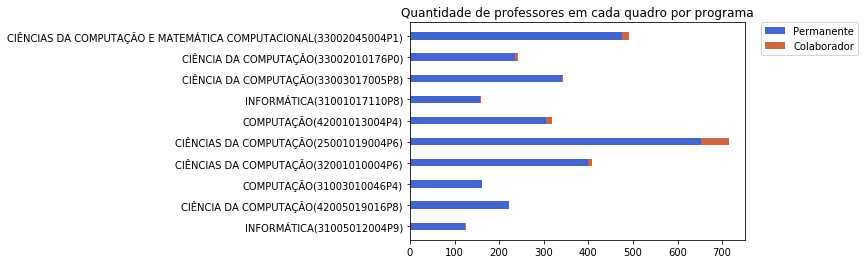

In [45]:
y = []
y2 = []
x_labels = docentes_discentes['programa'].unique()
for programa in x_labels:
    if not pd.isnull(programa):
        if programa in permanente.keys():
            y.append(permanente[programa])
        else:
            y.append(0)
        if programa in colaborador.keys():
            y2.append(colaborador[programa])
        else:
            y2.append(0)

x = range(len(x_labels))

plot_hbarchart(x, y, y2, x_labels, "Permanente", "Colaborador", "Quantidade de professores em cada quadro por programa")

# E2) Solução

Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [52]:
programas = discentes_data['programa'].dropna().unique()

nivel_by_program = discentes_data.groupby(['nivel', 'programa'])['nivel'].count()
mestrado_by_program = nivel_by_program['Mestrado']
doutorado_by_program = nivel_by_program['Doutorado']

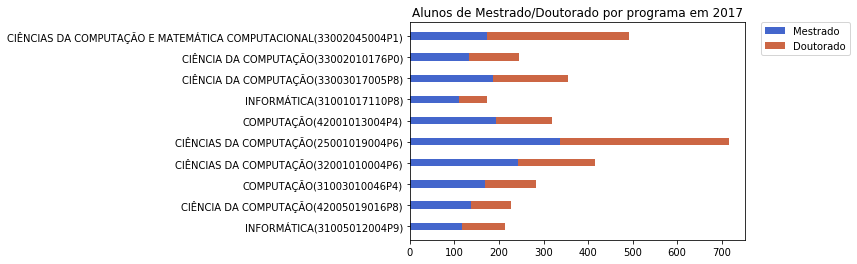

In [53]:
import numpy as np

y = []
y2 = []
x_labels = []
for programa in programas:
    if not pd.isnull(programa):
        x_labels.append(programa)
        y.append(mestrado_by_program[programa])
        y2.append(nivel_by_program['Doutorado'][programa])

x = range(len(x_labels))

plot_hbarchart(x, y, y2, x_labels, 'Mestrado', 'Doutorado', 'Alunos de Mestrado/Doutorado por programa em 2017')


# E3) Solução

Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

In [71]:
nivel_programa_professor = docentes_discentes.groupby(['nivel', 'programa', 'orientador'])['nivel'].count()
nivel_programa_professor = pd.DataFrame(nivel_programa_professor)
nivel_programa_professor

nivel
nivel     programa                             orientador                                     
Doutorado CIÊNCIA DA COMPUTAÇÃO(33002010176P0) ALAIR PEREIRA DO LAGO                         2
                                               ALAN MITCHELL DURHAM                          2
                                               ALFREDO GOLDMAN VEL LEJBMAN                   7
                                               ANA CRISTINA VIEIRA DE MELO                   4
                                               ANAROSA ALVES FRANCO BRANDAO                  2
                                               ANDRE FUJITA                                  9
                                               CARLOS HITOSHI MORIMOTO                       6
                                               CRISTINA GOMES FERNANDES                      1
                                               DANIEL MACEDO BATISTA                         3
                                               DENIS DERATANI MAUA                           2
                                               ERNESTO JULIÁN GOLDBERG BIRGIN                3
                                               FABIO KON                                     7
                                               FERNANDO MARIO DE OLIVEIRA FILHO              1
                                               FLAVIO SOARES CORREA DA SILVA                 9
                                               JAIME SIMAO SICHMAN                           1
                                               JUNIOR BARRERA                                1
                                               LELIANE NUNES DE BARROS                       3
                                               MARCEL PAROLIN JACKOWSKI                      2
                                               MARCELO FINGER                                4
                                               MARCELO GOMES DE QUEIROZ                      5
                                               MARCO AURELIO GEROSA                          4
                                               NINA SUMIKO TOMITA                            3
                                               PAULO ANDRE VECHIATTO DE MIRANDA              4
                                               RENATA WASSERMANN                             4
                                               ROBERTO HIRATA JUNIOR                         4
                                               ROBERTO MARCONDES CESAR JUNIOR                5
                                               RONALDO FUMIO HASHIMOTO                       3
                                               ROUTO TERADA                                  1
                                               SINAI ROBINS                                  1
                                               YOSHIHARU KOHAYAKAWA                          3
...                                                                                        ...
Mestrado  INFORMÁTICA(31001017110P8)           JOSE ORLANDO GOMES                            2
                                               JOSEFINO CABRAL MELO LIMA                     4
                                               LUCI PIRMEZ                                   2
                                               LUIZ FERNANDO RUST DA COSTA CARMO             5
                                               MARCELLO GOULART TEIXEIRA                     1
                                               MARCOS ROBERTO DA SILVA BORGES                2
                                               MARIA LUIZA MACHADO CAMPOS                    6
                                               MAURO ANTONIO RINCON                          3
                                               MITRE COSTA DOURADO                           1
                                               MONICA FERREIRA DA SILVA                      4
    

##### 

# E4) Solução

Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

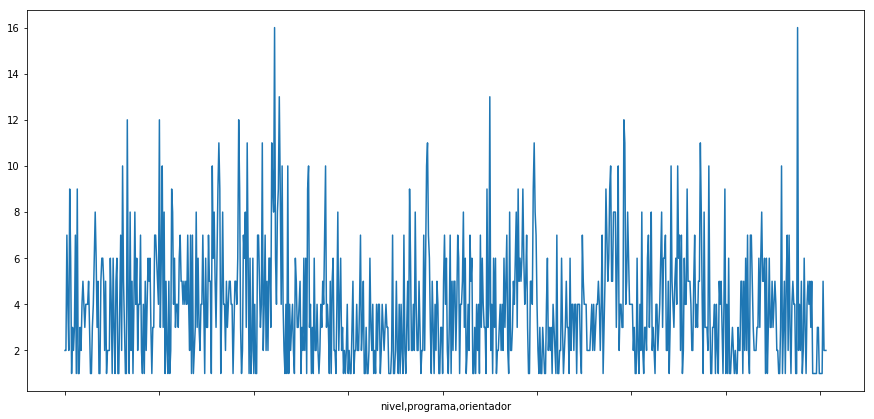

In [85]:
# plt.figure()
# plt.ylabel('Valor')
# plt.xlabel('Programa')
# plt.bar(mestrado_by_program.keys(), mestrado_by_program.values(), width = bar_width, color='#4466cc')
# _ = plt.xticks(x, x_labels, rotation='vertical')
# plt.figure()
# plt.ylabel('Valor')
# plt.xlabel('Programa')
# plt.bar(doutorado_by_program.keys(), doutorado_by_program.values(), width = bar_width, color='#cc6644')
# _ = plt.xticks(x, x_labels, rotation='vertical')

# plot_hbarchart()

# print(mestrado_by_program.values())
# print(doutorado_by_program.values())
fig, ax = plt.subplots(figsize=(15,7))
nivel_programa_professor['nivel'].plot(ax=ax)

# E5) Solução

Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [86]:
trabalhos_data.head(5)

,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies,keywords,linha,orientador,paginas,palavras_chave,programa,projeto_pesquisa,resumo,tipo,titulo,trabalho_id,volume
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",MARKUS ENDLER,121.0,Aglomeração Espacial;Aglomeração em Fluxo de D...,INFORMÁTICA (31005012004P9),-,"Clusters (ou concentrações) de objetos móveis,...",TESE,DG2CEP: An On-line Algorithm for Real-time Det...,5013040,1
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,59.0,Processamento de Linguagem Natural;Extração de...,INFORMÁTICA (31005012004P9),-,A Extração de Citações consiste na identificaç...,DISSERTAÇÃO,Direct and Indirect Quotation Extraction for P...,5013130,1
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,96.0,Aprendizado de Máquina;Processamento de Imagen...,INFORMÁTICA (31005012004P9),-,A classificação de imagens em contexto real é ...,DISSERTAÇÃO,Classificação de Objetos em Contexto Real por ...,5013137,1
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,RUY LUIZ MILIDIU,68.0,Aprendizado de máquina;Processamento de lingua...,INFORMÁTICA (31005012004P9),-,A Extração e Atribuição de Citações é a tarefa...,DISSERTAÇÃO,Deep Architecture for Quotation Extraction,5017265,1
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,MARKUS ENDLER,102.0,Detecção online de anomalia;processamento de e...,INFORMÁTICA (31005012004P9),-,Dirigir é uma tarefa diária que permite uma lo...,TESE,Detecção móvel e online de anomalia em múltipl...,5017316,1


In [87]:
trabalhos_discentes = trabalhos_data.merge(discentes_data, left_on='autor', right_on='nome')

_count_mestrado_tese = 0
_count_doutorado_tese = 0
_count_mestrado_dis = 0
_count_doutorado_dis = 0

for index, item in enumerate(trabalhos_discentes['data_defesa']):
    current_year = pd.to_datetime(item).year
    if not pd.isnull(current_year) and current_year == 2017:
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            if trabalhos_discentes['tipo'][index] == 'TESE':
                _count_mestrado_tese += 1
            if trabalhos_discentes['tipo'][index] == 'DISSERTAÇÃO':
                _count_mestrado_dis += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            if trabalhos_discentes['tipo'][index] == 'TESE':
                _count_doutorado_tese += 1
            if trabalhos_discentes['tipo'][index] == 'DISSERTAÇÃO':
                _count_doutorado_dis += 1
            
print("Teses de Mestrado: ", _count_mestrado_tese)
print("Dissertações de Mestrado: ", _count_mestrado_dis)
print("Teses de Doutorado: ", _count_doutorado_tese)    
print("Dissertações de Doutorado: ", _count_doutorado_dis)    
trabalhos_discentes

Teses de Mestrado:  1
Dissertações de Mestrado:  350
Teses de Doutorado:  234
Dissertações de Doutorado:  79


,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies_x,keywords,linha,...,ies_y,nacionalidade,nivel,nome,orientador_y,orientadores,programa_y,raca,sexo,situacao
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,MARCOS PAULINO RORIZ JUNIOR,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,RAFAEL DOS REIS SILVA,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,LUIS MARCELO VITAL ABREU FONSECA,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,IGOR OLIVEIRA VASCONCELOS,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),-,Masculino,TITULADO
5,This master's dissertation presents a solution...,Fernando Alberto_2017_Completo-1.pdf,ENGENHARIA DE SOFTWARE,FERNANDO ALBERTO CORREIA DOS SANTOS JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,24/04/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Software engineering;Examples of use;Use cas...,-,...,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,FERNANDO ALBERTO CORREIA DOS SANTOS JUNIOR,ARNDT VON STAA,"[{'nome': 'ARNDT VON STAA', 'categoria': 'Doce...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
6,One oftheproblemsfoundinnaturallanguageprocess...,Adriel Garcia_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,ADRIEL GARCIA HERNANDEZ,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,26/04/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'machinelearning;naturallanguageprocessing;co...,-,...,PONTIFÍCIA UNIVERS

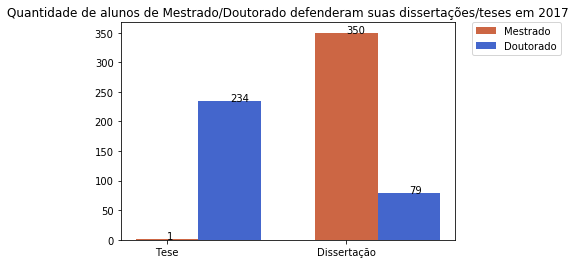

In [96]:
x_labels = ['Tese', 'Dissertação']
bar_width = 0.35
x2 = []
x = range(len(x_labels))
for item in x:
    x2.append(item + bar_width)
y = [_count_mestrado_tese, _count_mestrado_dis]
y2 = [_count_doutorado_tese, _count_doutorado_dis]

plt.figure()
plt.bar(x, y, width = bar_width, color='#cc6644', label='Mestrado')
for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.bar(x2, y2, width = bar_width, color='#4466cc', label='Doutorado')
for a,b in zip(x2, y2):
    plt.text(a, b, str(b))
plt.title('Quantidade de alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.xticks(x, x_labels)

# E6) Solução

Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [97]:
import unidecode

area_data_mestrado = {}
area_data_doutorado = {}
x_labels = []

for index, item in enumerate(trabalhos_discentes['area']):
    current_year = pd.to_datetime(trabalhos_discentes['data_defesa'][index]).year
    if not pd.isnull(current_year) and current_year == 2017 and not pd.isnull(item):
        item = unidecode.unidecode(item).upper()
        if item not in x_labels:
            x_labels.append(item)
        area_data_mestrado[item] = 0
        area_data_doutorado[item] = 0
    
for index, item in enumerate(trabalhos_discentes['area']):
    current_year = pd.to_datetime(trabalhos_discentes['data_defesa'][index]).year
    if not pd.isnull(current_year) and current_year == 2017 and not pd.isnull(item):
        item = unidecode.unidecode(item).upper()
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            area_data_mestrado[item] += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            area_data_doutorado[item] += 1
        
print(area_data_mestrado)
print(area_data_doutorado)

{'REDES DE COMPUTADORES E SISTEMAS DISTRIBUIDOS': 18, 'OTIMIZACAO E RACIOCINIO AUTOMATICO': 8, 'ENGENHARIA DE SOFTWARE': 2, 'BANCOS DE DADOS': 3, 'LINGUAGENS DE PROGRAMACAO': 0, 'COMPUTACAO GRAFICA': 4, 'INTERACAO HUMANO-COMPUTADOR': 1, 'TEORIA DA COMPUTACAO': 7, '-': 7, 'HIPERTEXTO E MULTIMIDIA': 0, 'CIENCIA DA COMPUTACAO': 139, 'COMPUTACAO VISUAL': 12, 'SISTEMAS DE COMPUTACAO': 25, 'ENGENHARIA DE SISTEMAS E INFORMACAO': 9, 'ALGORITMOS E OTIMIZACAO': 3, 'COMPUTACAO CIENTIFICA E SISTEMAS DE POTENCIA': 0, 'ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS': 1, 'COMPUTACAO INTELIGENTE': 14, 'BANCO DE DADOS': 5, 'ENGENHARIA DE SOFTWARE E LINGUAGENS DE PROGRAMACAO': 17, 'ENGENHARIA DA COMPUTACAO': 4, 'INTELIGENCIA COMPUTACIONAL': 3, 'PROJETO DE SISTEMAS ELETRONICOS E COMPUTACIONAIS': 3, 'REDES DE COMPUTADORES': 6, 'INTELIGENCIA ARTIFICIAL': 5, 'CIENCIA DE DADOS E ENGENHARIA DE SOFTWARE': 11, 'ENGENHARIA DA INFORMACAO': 17, 'CIENCIAS  DE COMPUTACAO E MATEMATICA COMPUTACIONAL': 27}
{'REDES DE 

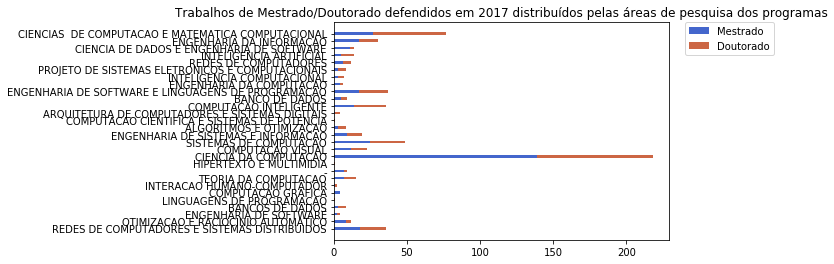

In [98]:
x = range(len(x_labels))

plot_hbarchart(x, list(area_data_mestrado.values()), list(area_data_doutorado.values()), x_labels, 'Mestrado', 'Doutorado', 'Trabalhos de Mestrado/Doutorado defendidos em 2017 distribuídos pelas áreas de pesquisa dos programas')
# plt.figure()
# plt.barh(x, list(area_data_mestrado.values()), height = 0.5, color='#4466cc', label='Mestrado')
# plt.barh(x, list(area_data_doutorado.values()), height = 0.5, color='#cc6644', label='Doutorado')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# _ = plt.yticks(x, x_labels)
               

# E7) Solução

Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

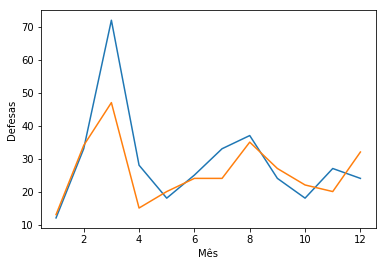

In [102]:
from matplotlib.dates import MonthLocator
import calendar

mestrado_per_month = {}
doutorado_per_month = {}
for index, row in enumerate(trabalhos_discentes['data_defesa']):
    current_month = pd.to_datetime(row).month
    if not pd.isnull(current_month):
        mestrado_per_month[current_month] = 0
        doutorado_per_month[current_month] = 0

for index, row in enumerate(trabalhos_discentes['data_defesa']):
    current_month = pd.to_datetime(row).month
    if not pd.isnull(current_month):
        if trabalhos_discentes['nivel'][index] == 'Mestrado':
            mestrado_per_month[current_month] += 1
        if trabalhos_discentes['nivel'][index] == 'Doutorado':
            doutorado_per_month[current_month] += 1

mordered = {}
for key in sorted(mestrado_per_month.keys()):
    mordered[key] = mestrado_per_month[key]   
dordered = {}
for key in sorted(doutorado_per_month.keys()):
    dordered[key] = doutorado_per_month[key]


plt.figure()
plt.plot(mordered.keys(), mordered.values())
plt.plot(dordered.keys(), dordered.values())
plt.ylabel('Defesas')
plt.xlabel('Mês')
plt.show()

#separar por mestrado e doutorado

Obs.: 

** por programa => colocar a instituição de ensino do lado do programa